# Shanghai Composite vs.  Wilshire 5000 During Economic Downturns
  Exploratory analysis of both the Shanghai Composite and Wilshire 5000 Indices. We aim to identify and compare the volatility levels in both indices during economic downturns, analyzing key features like sharp price drops, recovery times, and overall market behavior. By exploring these differences, we aim to gain insights into how each market reacts under financial stress and which factors contribute to these fluctuations.
### Current Periods Tested On:
* Dot-Com Bubble Burst : March 2001 - November 2001
* Great Recession : December 2007 - June 2009
* COVID-19: February 2020 - April 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

c:\Users\rocky\anaconda3\envs\data_sc\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Recessions DB, GR, COVID -- [Start, End]
recessions = {
    "Dot_Bomb": ["2001-03-01", "2001-11-30"],
    "Great_Rec": ["2007-12-01", "2009-06-30"],
    "COVID": ["2020-02-01", "2020-04-30"]
}

In [3]:
def to_dataframe(filename):
    # drop first row, contains irrelevant values
    df = pd.read_csv(filename)

    # convert Date to Datetime for time series manip
    df["Date"] = pd.DatetimeIndex(df["Date"])
    df = df.set_index("Date")
    df.drop("NaT", axis=0, inplace=True)

    # columns imported as objects, convert to float
    numeric_cols = ["Open", "High", "Low", "Close", "Adj Close", "Normalized", "Volume"]
    df[numeric_cols] = df[numeric_cols].astype(float)

    return df

shanghai = to_dataframe("shanghai_composite_data.csv")
shanghai_ind = shanghai["Index"].iloc[0]

wilshire = to_dataframe("wilshire_5000_data.csv")
wilshire_ind = wilshire["Index"].iloc[0]

In [4]:
# Function used to generate preliminary statisitcs about the dataset using the ydata_profiling package:

def get_report(df):
    profile = ProfileReport(df, title=f"{df["Index"][0]} Data Report")
    profile.to_file(f"{df["Index"][0]}_report.html")

In [5]:
shanghai.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5810 entries, 2000-01-04 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Adj Close     5810 non-null   float64
 1   Close         5810 non-null   float64
 2   High          5810 non-null   float64
 3   Low           5810 non-null   float64
 4   Open          5810 non-null   float64
 5   Volume        5810 non-null   float64
 6   Normalized    5810 non-null   float64
 7   Daily Return  5809 non-null   float64
 8   Index         5810 non-null   object 
dtypes: float64(8), object(1)
memory usage: 453.9+ KB


In [6]:
wilshire.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6030 entries, 2000-01-03 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Adj Close     6030 non-null   float64
 1   Close         6030 non-null   float64
 2   High          6030 non-null   float64
 3   Low           6030 non-null   float64
 4   Open          6030 non-null   float64
 5   Volume        6030 non-null   float64
 6   Normalized    6030 non-null   float64
 7   Daily Return  6029 non-null   float64
 8   Index         6030 non-null   object 
dtypes: float64(8), object(1)
memory usage: 471.1+ KB


In [7]:
# Basic view of both datasets
shanghai.describe()

,Adj Close,Close,High,Low,Open,Volume,Normalized,Daily Return
count,5810.000000,5810.000000,5810.000000,5810.000000,5810.000000,5.810000e+03,5810.000000,5809.000000
mean,2596.080125,2596.080125,2615.848081,2571.082099,2594.022282,1.420697e+05,1.845943,0.000239
std,867.757120,867.757120,876.304567,855.972516,867.036737,1.871958e+05,0.617019,0.014836
min,1011.499023,1011.499023,1019.921997,998.228027,1007.901001,0.000000e+00,0.719226,-0.088406
25%,1941.651245,1941.651245,1955.183533,1921.496307,1939.045990,2.840000e+04,1.380611,-0.006337
50%,2703.520508,2703.520508,2730.404541,2673.864014,2696.138428,1.086000e+05,1.922338,0.000507
75%,3189.906677,3189.906677,3212.319214,3166.586060,3189.804321,2.093500e+05,2.268183,0.007145
max,6092.057129,6092.057129,6124.043945,6040.712891,6057.428223,1.006520e+07,4.331757,0.098570


In [8]:
wilshire.describe()

,Adj Close,Close,High,Low,Open,Volume,Normalized,Daily Return
count,6030.000000,6030.000000,6030.000000,6030.000000,6030.000000,6030.0,6030.000000,6029.000000
mean,20105.076404,20105.076404,20194.430672,20000.170003,20099.316922,0.0,1.466404,0.000288
std,10949.725487,10949.725487,11036.940555,10850.864875,10945.789414,0.0,0.798640,0.012525
min,6858.430176,6858.430176,6858.430176,6858.430176,6858.430176,0.0,0.500233,-0.122472
25%,11852.220459,11852.220459,11881.800049,11835.820312,11850.952881,0.0,0.864466,-0.004906
50%,14708.660156,14708.660156,14733.375000,14665.534668,14707.839844,0.0,1.072806,0.000618
75%,26790.255859,26790.255859,26849.402832,26659.799805,26755.570312,0.0,1.954001,0.006067
max,48951.718750,48951.718750,49089.390625,48868.230469,48951.718750,0.0,3.570392,0.114011


Text(0.5, 1.0, 'Indices Closing Price Over Time')

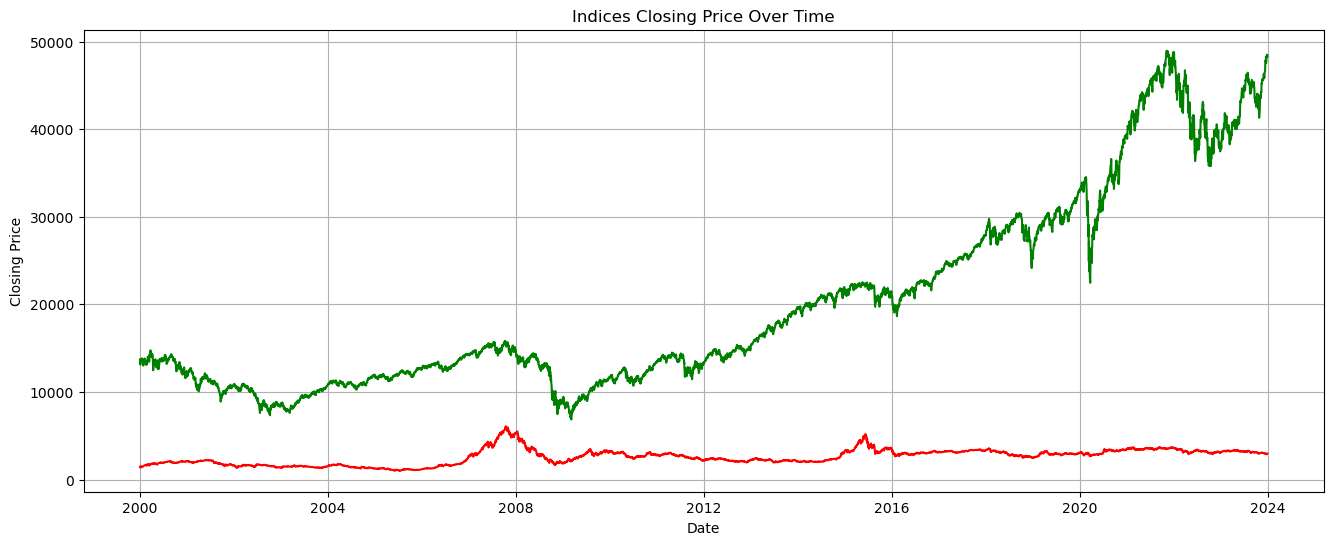

In [9]:
# Showing historical close data (2000 - 2023)
plt.figure(figsize=(16, 6))
plt.plot(shanghai["Adj Close"], label=f"{shanghai_ind} Closing Price", color='r')
plt.plot(wilshire["Adj Close"], label=f"{wilshire_ind} Closing Price", color='g')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.title("Indices Closing Price Over Time")

### Shanghai Rolling Average per Recession Period

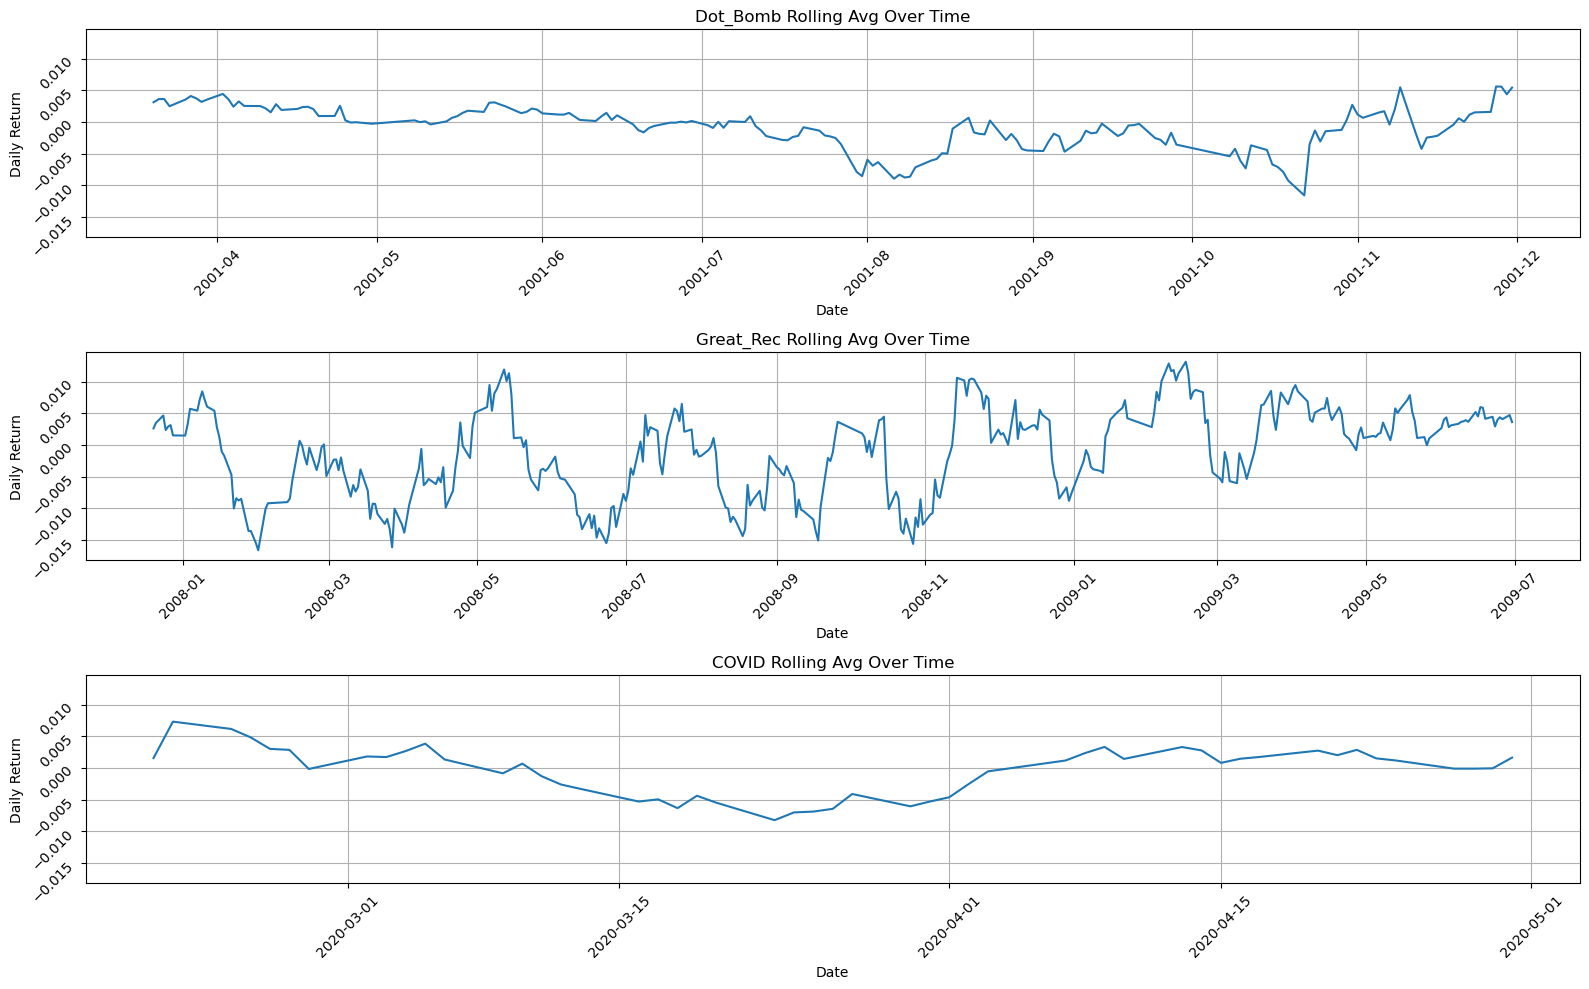

In [10]:
def rolling_avg(df, col, win_size=14):
    f, axes = plt.subplots(3,1, figsize=(16,10), sharey=True)

    for ax, (period, dates) in zip(axes, recessions.items()):
        start, end = dates
        df_col = df.loc[start : end, col]

        rolling_avg = df_col.rolling(window=win_size, center=False).mean()
        ax.plot(rolling_avg, label=f'{period}')
        ax.grid(True)
        ax.set_xlabel("Date")
        ax.tick_params(labelrotation=45)
        ax.set_ylabel(f"{col}")
        ax.set_title(f"{period} Rolling Avg Over Time")
    
    f.tight_layout()
rolling_avg(shanghai, "Daily Return")

### Wilshire Rolling Average per Recession Period

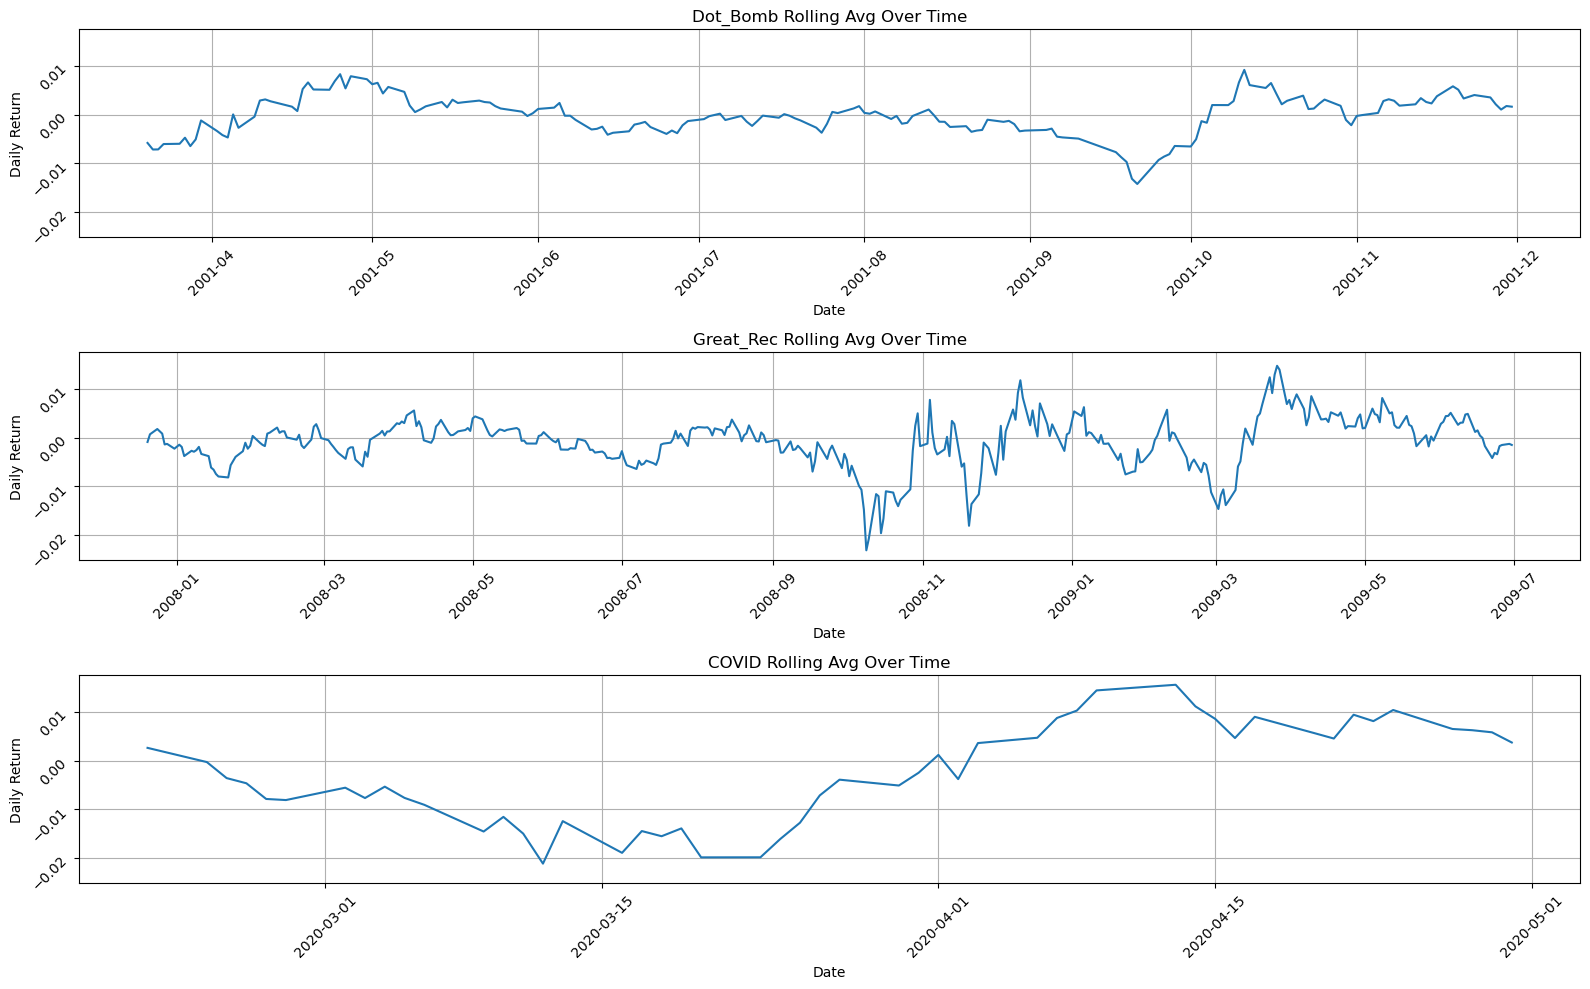

In [11]:
rolling_avg(wilshire, "Daily Return")

### Shanghai Rolling Standard Deviation per Recession Period

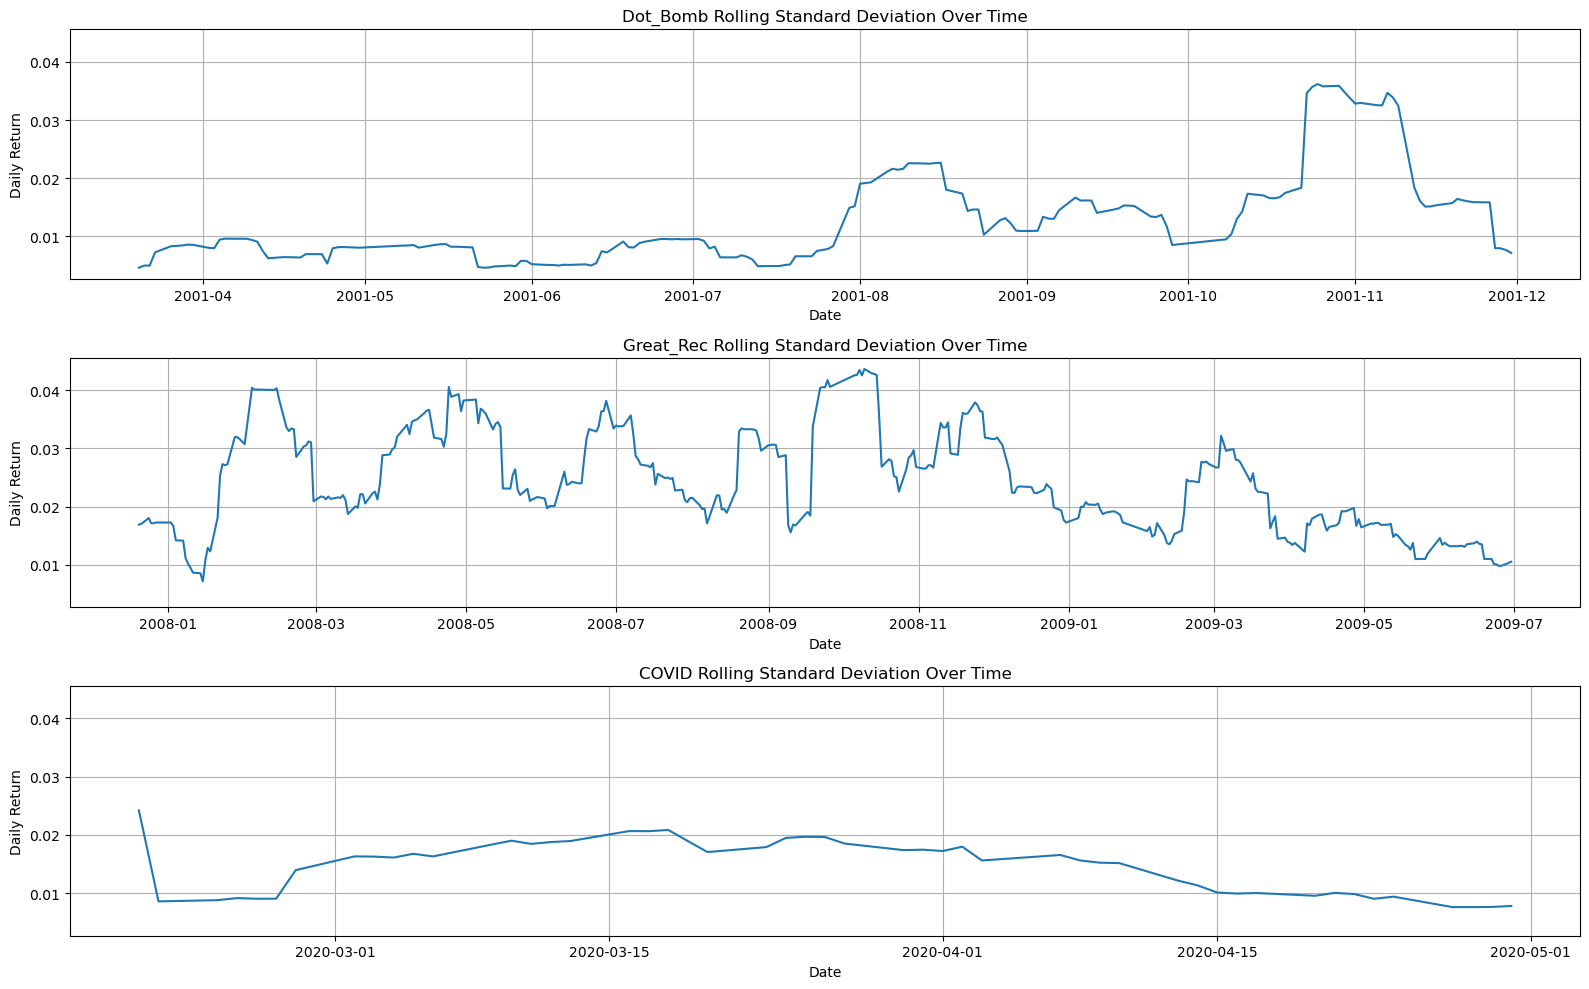

In [12]:
def rolling_std(df, col, win_size=14):
    f, axes = plt.subplots(3,1, figsize=(16,10), sharey=True)

    for ax, (period, dates) in zip(axes, recessions.items()):
        start, end = dates
        df_col = df.loc[start : end, col]

        rolling_avg = df_col.rolling(window=win_size, center=False).std()
        ax.plot(rolling_avg, label=f'{period}')
        ax.grid(True)
        ax.set_xlabel("Date")
        ax.set_ylabel(f"{col}")
        ax.set_title(f"{period} Rolling Standard Deviation Over Time")
    
    f.tight_layout()
rolling_std(shanghai, "Daily Return")

### Shanghai Adjusted Close Distribution (Full Dataset)

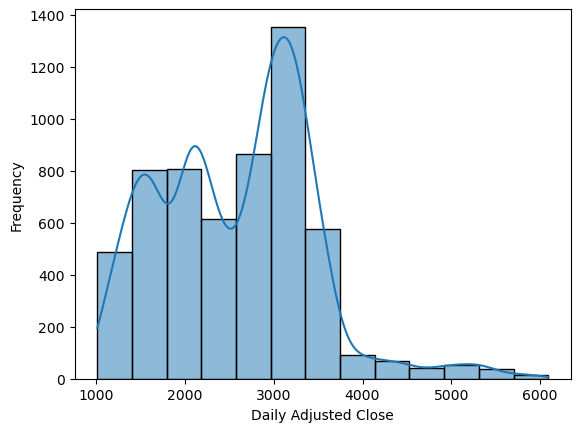

In [13]:
# Distribution of Prices
def close_hist(df):
    # bins chosen using Sturge eq
    sns.histplot(df["Adj Close"], bins=13, kde=True)
    plt.xlabel("Daily Adjusted Close")
    plt.ylabel("Frequency")

close_hist(shanghai)

### Wilshire Adjusted Close Distribution (Full Dataset)

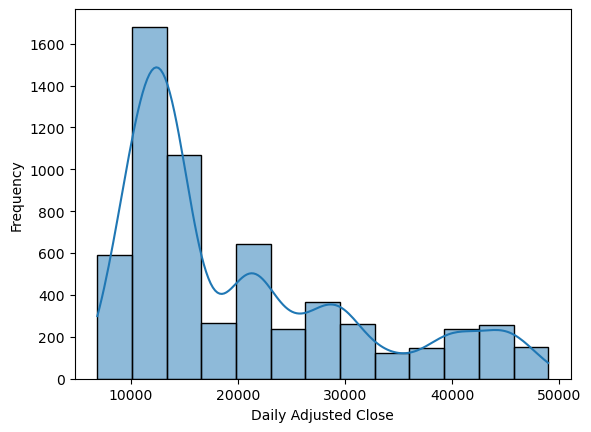

In [14]:
close_hist(wilshire)

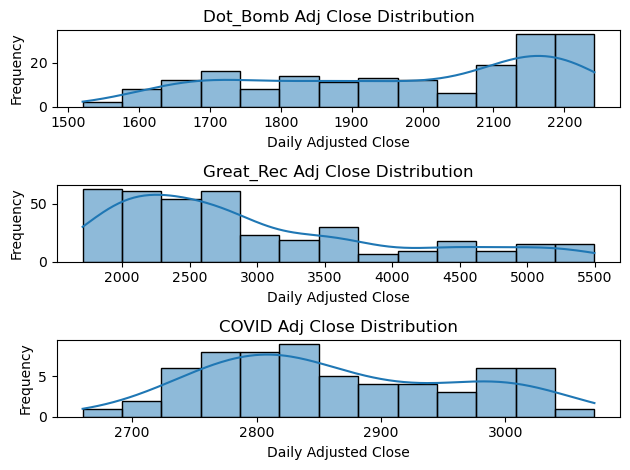

In [15]:
# Placeholder for FacetGrid usage
def recession_hist(df):
    f, axes = plt.subplots(3,1)
    
    for ax, (period, dates) in zip(axes, recessions.items()):
        start, end = dates
        df_col = df.loc[start : end, "Adj Close"]

        sns.histplot(df_col, bins=13, kde=True, ax=ax)
        ax.set_title(f"{period} Adj Close Distribution")
        ax.set_xlabel("Daily Adjusted Close")
        ax.set_ylabel("Frequency")

    f.tight_layout()

recession_hist(shanghai)